In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
from IPython.display import Image  
import pydotplus

In [3]:
df = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ML for Cities\Final project\NYCclean_ML4C\Data\final_merged_normalized_discretized.csv')

In [4]:
df.head()

Unnamed: 0    CD  Year  Month  dirty_level  Count311_pp  fs_openhours  \
0           0  BK01  2016     11            2     0.000289        333.25   
1           1  BK01  2016     12            1     0.000208        333.25   
2           2  BK01  2017      1            2     0.000295        333.25   
3           3  BK01  2017      2            2     0.000352        333.25   
4           4  BK01  2017      3            2     0.000387        333.25   

   trs_permits  total_number_of_households  hh_compost_percent  \
0         14.0                       92610            0.105226   
1         14.0                       92610            0.105226   
2         14.0                       92610            0.105226   
3         14.0                       92610            0.105226   
4         14.0                       92610            0.105226   

   wfr_avg_recycling  wfr_avg_refuse  wfr_avg_bulk  pct_bach_deg  over65_rate  \
0                1.0             3.0           3.0          47.0          9.3   
1                1.0             3.0           3.0          47.0          9.3   
2                1.0             3.0           3.0          47.0          9.3   
3                1.0             3.0           3.0          47.0          9.3   
4                1.0             3.0           3.0          47.0          9.3   

   under18_rate  pct_white_nh  poverty_rate  pct_hh_rent_burd  mean_commute  \
0          24.0          61.3          15.4              40.7          34.3   
1          24.0          61.3          15.4              40.7          34.3   
2          24.0          61.3          15.4              40.7          34.3   
3          24.0          61.3          15.4              40.7          34.3   
4          24.0          61.3          15.4              40.7          34.3   

   unemployment  crime_per_1000   pop_density  numbldgs  unitstotal  \
0           4.0            10.9  36626.118079     17147      100971   
1           4.0            10.9  36626.118079     17147      100971   
2           4.0            10.9  36626.118079     17147      100971   
3           4.0            10.9  36626.118079     17147      100971   
4           4.0            10.9  36626.118079     17147      100971   

   asland_sqft  pct_clean_strts  pct_lot_area_open_space  \
0     10.78427             86.4                     5.19   
1     10.78427             86.4                     5.19   
2     10.78427             86.4                     5.19   
3     10.78427             86.4                     5.19   
4     10.78427             86.4                     5.19   

   pct_lot_area_public_facility_institution  pct_lot_area_res_1_2_family_bldg  \
0                                      5.33                              5.25   
1                                      5.33                              5.25   
2                                      5.33                              5.25   
3                                      5.33                              5.25   
4                                      5.33                              5.25   

   pct_lot_area_res_multifamily_walkup  REFUSETONSCOLLECTED_pp  \
0                                 16.9                0.030335   
1                                 16.9                0.031254   
2                                 16.9                0.029985   
3                                 16.9                0.027186   
4                                 16.9                0.031642   

   PAPERTONSCOLLECTED_pp  MGPTONSCOLLECTED_pp  RESORGANICSTONS_pp  \
0               0.003049             0.002327            0.000098   
1               0.004196             0.002895            0.000068   
2               0.003404             0.002630            0.000086   
3               0.002921             0.002287            0.000061   
4               0.003253             0.002619            0.000061   

   paper_baskets_sqmi  mgp_baskets_sqmi  seasonal_wire_litter_basket_sqmi  \
0            1.904491  

In [116]:
# split the data into training, validation, and test
X_train_nv,X_test,y_train_nv,y_test=train_test_split(df.loc[:,'fs_openhours':],df['dirty_level'], test_size=0.2, random_state=999)

In [164]:
# learn a single decision tree classifier, randomly choose max_depth=10
dt=DecisionTreeClassifier(max_depth=10)
dt.fit(X_train_nv,y_train_nv)

# in sample accuracy
print('In sample accuracy:',dt.score(X_train_nv,y_train_nv))

# OS accuracy
print('OS accuracy:',dt.score(X_test,y_test))

In sample accuracy: 0.7478448275862069
OS accuracy: 0.5609756097560976


In [97]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(3,20,1)}
dt_tuned=DecisionTreeClassifier()
clf_dt=GridSearchCV(dt_tuned,param_grid=param_grid,cv=5)
clf_dt=clf_dt.fit(X_train_nv,y_train_nv)
print(clf_dt.best_params_)
clf_dt.best_score_

{'max_depth': 12}


0.5639377187657415

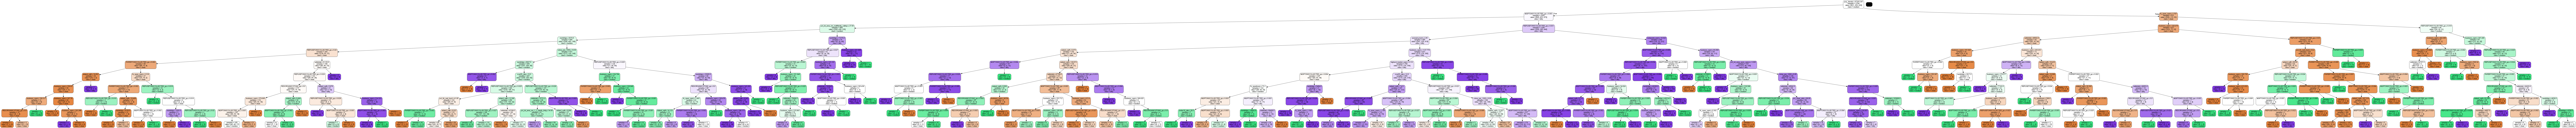

In [165]:
#visualize the graph
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train_nv.columns.values, 
                         class_names=['clean','medium','dirty'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())

In [173]:
fi_dt=pd.DataFrame([list(X_train_nv.columns),list(dt.feature_importances_)]).T
fi_dt.columns=["variables","importance"]

# list the top 10 most important features in order
fi_dt.sort_values(by="importance",ascending=False).iloc[:10,:]

variables importance
27     MGPTONSCOLLECTED_pp   0.162145
25  REFUSETONSCOLLECTED_pp   0.155688
16             pop_density   0.131163
38           business_sqmi   0.111264
19             asland_sqft   0.083835
26   PAPERTONSCOLLECTED_pp   0.059568
17                numbldgs   0.057846
18              unitstotal   0.043642
36            fs_open_sqmi   0.035033
15          crime_per_1000   0.027063

## Random Forest

In [119]:
#use the max_depth from the single decision tree. No need to tune n_estimators because it only gets better/more stable with larger number
rf = RandomForestClassifier(n_estimators=10000, n_jobs=-1,max_depth=12)
rf.fit(X_train_nv, y_train_nv)
print(rf.score(X_test,y_test))

0.6556671449067432


In [172]:
fi_rf=pd.DataFrame([list(X_train_nv.columns),list(rf.feature_importances_)]).T
fi_rf.columns=["variables","importance"]

# list the top 10 most important features in order
fi_rf.sort_values(by="importance",ascending=False).iloc[:10,:]

variables importance
25  REFUSETONSCOLLECTED_pp   0.129119
38           business_sqmi   0.118684
27     MGPTONSCOLLECTED_pp   0.106998
26   PAPERTONSCOLLECTED_pp   0.097692
17                numbldgs   0.073748
19             asland_sqft   0.073399
18              unitstotal   0.063836
28      RESORGANICSTONS_pp   0.041801
16             pop_density   0.036089
36            fs_open_sqmi   0.018093

## Try Adaboost

In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [122]:
#untuned
abc = AdaBoostClassifier()
abc.fit(X_train_nv, y_train_nv)
abc.score(X_test,y_test)

0.5968436154949784

In [62]:
#trying a pretty wide range for the gridsearch, might narrow it down in further gridsearches
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

param_grid = {
                'base_estimator__max_leaf_nodes':[i for i in range(30,75,5)],
                'n_estimators':[200,300,400,500],
                'learning_rate':[.001, .005,.01,.03,.1]
                }

clf = GridSearchCV(abc, param_grid=param_grid,verbose=3,n_jobs=-1, cv=5,)
clf.fit(X_train_nv,y_train_nv)


print(clf.best_params_)

clf.best_score_

# print(f'IS: {abc.score(X_train, y_train)}')
# print(f'Val: {abc.score(X_val, y_val)}')

Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'base_estimator__max_leaf_nodes': 40, 'learning_rate': 0.005, 'n_estimators': 500}


0.6059743228756312

In [67]:
clf.score(X_train_nv,y_train_nv)

0.9033764367816092

In [69]:
clf.score(X_test,y_test)

0.6255380200860832

In [63]:
#interesting that this one suggests fewer leaf nodes, but it's pretty comparable to the first one
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

param_grid = {
                'base_estimator__max_leaf_nodes':[i for i in range(30,50,5)],
                'n_estimators':[500,550,600],
                'learning_rate':[.001, .005,.01]
                }

clf1 = GridSearchCV(abc, param_grid=param_grid,verbose=3,n_jobs=-1, cv=5,)
clf1.fit(X_train_nv,y_train_nv)


print(clf1.best_params_)

clf1.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'base_estimator__max_leaf_nodes': 30, 'learning_rate': 0.005, 'n_estimators': 500}


0.6012903142477042

In [76]:
#this one is back to the original parameters
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

param_grid = {
                'base_estimator__max_leaf_nodes':[i for i in range(20,45,5)],
                'n_estimators':[450,500,550],
                'learning_rate':[.001, .005,.01]
                }

clf2 = GridSearchCV(abc, param_grid=param_grid,verbose=3,n_jobs=-1, cv=5,)
clf2.fit(X_train_nv,y_train_nv)


print(clf2.best_params_)

clf2.best_score_

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'base_estimator__max_leaf_nodes': 40, 'learning_rate': 0.005, 'n_estimators': 500}


0.6038192785089702

In [77]:
#now that we've narrowed the likely best values, we can tune with more precise ranges. This will be the last tuning
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

param_grid = {
                'base_estimator__max_leaf_nodes':[i for i in range(36,45,2)],
                'n_estimators':[480,500,520],
                'learning_rate':[.004, .005,.006]
                }

clf3 = GridSearchCV(abc, param_grid=param_grid,verbose=3,n_jobs=-1, cv=5,)
clf3.fit(X_train_nv,y_train_nv)


print(clf3.best_params_)

clf3.best_score_

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'base_estimator__max_leaf_nodes': 38, 'learning_rate': 0.004, 'n_estimators': 500}


0.6063282228795062

In [81]:
clf3.score(X_test,y_test)

0.6355810616929699

In [131]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12))

param_grid = {
                #'base_estimator__max_depth':[i for i in range(6,13,1)],
                'n_estimators':range(10,100,10),
                'learning_rate':np.logspace(-3,0,10)
                }

clf4 = GridSearchCV(abc, param_grid=param_grid,verbose=3,n_jobs=-1, cv=5,)
clf4.fit(X_train_nv,y_train_nv)


print(clf4.best_params_)

clf4.best_score_

Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'learning_rate': 1.0, 'n_estimators': 40}


0.6124297689317127

In [145]:
clf4.score(X_test, y_test)

0.6255380200860832

In [143]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

param_grid = {
                'base_estimator__max_depth':[i for i in range(6,13,2)],
                'n_estimators':range(40,80,10),
                'learning_rate':np.logspace(-.5,.3,4)
                }

clf5 = GridSearchCV(abc, param_grid=param_grid,verbose=3,n_jobs=-1, cv=5,)
clf5.fit(X_train_nv,y_train_nv)


print(clf5.best_params_)

print(f'IS: {clf5.best_score_}')
print(f'OS: {clf5.score(X_test, y_test)}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'base_estimator__max_depth': 10, 'learning_rate': 1.0797751623277096, 'n_estimators': 50}
IS: 0.6131414437570231
OS: 0.6212338593974175


In [171]:
fi_abc=pd.DataFrame([list(X_train_nv.columns),list(clf5.best_estimator_.feature_importances_)]).T
fi_abc.columns=["variables","importance"]

# list the top 10 most important features in order
fi_abc.sort_values(by="importance",ascending=False).iloc[:10,:]

variables importance
18               unitstotal   0.066288
19              asland_sqft   0.050567
17                 numbldgs   0.038626
0              fs_openhours   0.035147
21  pct_lot_area_open_space   0.033581
36             fs_open_sqmi   0.026213
32      highend_basket_sqmi   0.022805
20          pct_clean_strts    0.01943
37          restaurant_sqmi   0.018175
8               over65_rate   0.015814

## Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier


In [150]:
#untuned GBC
gbc = GradientBoostingClassifier()
gbc = gbc.fit(X_train_nv,y_train_nv)
print(gbc.score(X_train_nv,y_train_nv))
print(gbc.score(X_test,y_test))

0.7381465517241379
0.6327116212338594


In [157]:
np.logspace(-1.1,.3,5)

array([0.07943282, 0.17782794, 0.39810717, 0.89125094, 1.99526231])

In [159]:
gbc = GradientBoostingClassifier()

param_grid = {
                #'max_depth':[i for i in range(6,13,2)],
                'n_estimators':[100,120,140,160],
                'learning_rate':np.logspace(-1.1,.3,5)
                }

clf_gbc = GridSearchCV(gbc, param_grid=param_grid,verbose=3,n_jobs=-1, cv=5)
clf_gbc.fit(X_train_nv,y_train_nv)


print(clf_gbc.best_params_)

print(f'IS: {clf_gbc.best_score_}')
print(f'OS: {clf_gbc.score(X_test, y_test)}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'learning_rate': 0.1778279410038923, 'n_estimators': 120}
IS: 0.6217674334500084
OS: 0.6513629842180775


In [170]:
fi_gbc=pd.DataFrame([list(X_train_nv.columns),list(clf_gbc.best_estimator_.feature_importances_)]).T
fi_gbc.columns=["variables","importance"]

# list the top 10 most important features in order
fi_gbc.sort_values(by="importance",ascending=False).iloc[:10,:]

variables importance
25  REFUSETONSCOLLECTED_pp   0.164901
38           business_sqmi   0.116176
16             pop_density   0.095549
27     MGPTONSCOLLECTED_pp   0.091068
19             asland_sqft   0.077037
26   PAPERTONSCOLLECTED_pp   0.060397
17                numbldgs   0.046704
18              unitstotal   0.041812
28      RESORGANICSTONS_pp   0.037939
15          crime_per_1000   0.033583

## Summarize scores

In [82]:
from sklearn.metrics import roc_auc_score, classification_report, f1_score, recall_score, precision_score

In [ ]:
# # create blank df to which we can concat scores 
# all_scores = pd.DataFrame(columns=['model', 'acc', 'auc', 'rec', 'prec', 'f-value', 'comment'])
# all_scores.to_csv('model_all_scores.csv')

In [91]:
def scoring_table(model, model_name, multi_class, comment):
  # model: model object e.g. of type SVC 
  # model_name: str of model name 
  # multi_class: ovr or ovo 
  # comment: model parameters
  
  # scoring parameters included are 
  # accuracy, auc (multi_class specified by user), recall, precision (both macro - unweighted mean),  
  
  global X_test
  global y_test

  all_scores = pd.read_csv('model_all_scores.csv', index_col=0)

  # get predictions
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)

  # accuracy
  acc = round(model.score(X_test,y_test),4)

  # auc roc 
  auc = round(roc_auc_score(y_test,y_pred_proba, multi_class=multi_class),4)

  # recall
  rec = round(recall_score(y_test,y_pred, average='macro'),4)

  # precision
  prec = round(precision_score(y_test,y_pred, average='macro'),4)

  # f1
  f1 = round(f1_score(y_test,y_pred,  average='macro'),4)

  scores = pd.DataFrame([str(model_name), acc, auc, rec, prec, f1, str(comment)]).T
  scores.columns = all_scores.columns

  all_scores = pd.concat([all_scores,scores], axis=0, ignore_index=True)
  
  all_scores.to_csv('model_all_scores.csv')
  return all_scores

In [84]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def c_matrix(model, title, filename):
  # model: model object
  # title: string title of confusion matrix
  # filename: string file name, please include .png at end
  
  global y_test
  y_pred = model.predict(X_test)
  
  f, ax = plt.subplots(figsize=(7, 5))
  sns.heatmap(confusion_matrix(y_test, y_pred),
              annot=True, 
              fmt="d", 
              linewidths=.5, 
              xticklabels=('0','1'),
              yticklabels=('0','1'),
              cmap="YlGnBu").set(title=str(title))
  
  plt.savefig(str(filename), dpi=400)

In [94]:
scoring_table(dt,'Untuned Decision Tree','ovr','randomly selected max_depth = 10')

model     acc     auc     rec    prec f-value  \
0                    svm  0.4419   0.645  0.4394  0.4415    0.44   
1                    svm  0.6485   0.803  0.6469  0.6495  0.6477   
2  Untuned Decision Tree  0.5552  0.7104  0.5543   0.567  0.5582   

                                             comment  
0                                            untuned  
1  {'C': 54.04942954924472, 'decision_function_sh...  
2                   randomly selected max_depth = 10

In [98]:
scoring_table(clf_dt,'Tuned Decision Tree','ovr','tuned max depth of 12')

model     acc     auc     rec    prec f-value  \
0                    svm  0.4419   0.645  0.4394  0.4415    0.44   
1                    svm  0.6485   0.803  0.6469  0.6495  0.6477   
2  Untuned Decision Tree  0.5552  0.7104  0.5543   0.567  0.5582   
3    Tuned Decision Tree  0.5796  0.7091  0.5772  0.5724  0.5722   

                                             comment  
0                                            untuned  
1  {'C': 54.04942954924472, 'decision_function_sh...  
2                   randomly selected max_depth = 10  
3                              tuned max depth of 12

In [121]:
scoring_table(rf,'Random Forest','ovr','used max_depth of 12 from tuned decision tree, no need to tune n_estimators because it only gets better without risk of overfitting')

model     acc     auc     rec    prec f-value  \
0                    svm  0.4419   0.645  0.4394  0.4415    0.44   
1                    svm  0.6485   0.803  0.6469  0.6495  0.6477   
2  Untuned Decision Tree  0.5552  0.7104  0.5543   0.567  0.5582   
3    Tuned Decision Tree  0.5796  0.7091  0.5772  0.5724  0.5722   
4          Random Forest  0.6557  0.8313  0.6539  0.6527  0.6509   

                                             comment  
0                                            untuned  
1  {'C': 54.04942954924472, 'decision_function_sh...  
2                   randomly selected max_depth = 10  
3                              tuned max depth of 12  
4  used max_depth of 12 from tuned decision tree,...

In [146]:
scoring_table(clf5,'Tuned Adaboost','ovr','best parameters: base_estimator__max_depth: 10, learning_rate: 1.0797751623277096, n_estimators: 50')

model     acc     auc     rec    prec f-value  \
0                    svm  0.4419   0.645  0.4394  0.4415    0.44   
1                    svm  0.6485   0.803  0.6469  0.6495  0.6477   
2  Untuned Decision Tree  0.5552  0.7104  0.5543   0.567  0.5582   
3    Tuned Decision Tree  0.5796  0.7091  0.5772  0.5724  0.5722   
4          Random Forest  0.6557  0.8313  0.6539  0.6527  0.6509   
5       Untuned Adaboost  0.5968  0.7387  0.5959  0.6012  0.5967   
6         Tuned Adaboost  0.6212  0.8012  0.6195  0.6203  0.6192   

                                             comment  
0                                            untuned  
1  {'C': 54.04942954924472, 'decision_function_sh...  
2                   randomly selected max_depth = 10  
3                              tuned max depth of 12  
4  used max_depth of 12 from tuned decision tree,...  
5                                            untuned  
6  best parameters: base_estimator__max_depth: 10...

In [123]:
scoring_table(abc,'Untuned Adaboost','ovr','untuned')

model     acc     auc     rec    prec f-value  \
0                    svm  0.4419   0.645  0.4394  0.4415    0.44   
1                    svm  0.6485   0.803  0.6469  0.6495  0.6477   
2  Untuned Decision Tree  0.5552  0.7104  0.5543   0.567  0.5582   
3    Tuned Decision Tree  0.5796  0.7091  0.5772  0.5724  0.5722   
4          Random Forest  0.6557  0.8313  0.6539  0.6527  0.6509   
5       Untuned Adaboost  0.5968  0.7387  0.5959  0.6012  0.5967   

                                             comment  
0                                            untuned  
1  {'C': 54.04942954924472, 'decision_function_sh...  
2                   randomly selected max_depth = 10  
3                              tuned max depth of 12  
4  used max_depth of 12 from tuned decision tree,...  
5                                            untuned

In [151]:
scoring_table(gbc,'Untuned Gradient Boosting Classifier','ovr','untuned')

model     acc     auc     rec    prec  \
0                                   svm  0.4419   0.645  0.4394  0.4415   
1                                   svm  0.6485   0.803  0.6469  0.6495   
2                 Untuned Decision Tree  0.5552  0.7104  0.5543   0.567   
3                   Tuned Decision Tree  0.5796  0.7091  0.5772  0.5724   
4                         Random Forest  0.6557  0.8313  0.6539  0.6527   
5                      Untuned Adaboost  0.5968  0.7387  0.5959  0.6012   
6                        Tuned Adaboost  0.6212  0.8012  0.6195  0.6203   
7  Untuned Gradient Boosting Classifier  0.6327  0.8067  0.6311  0.6277   

  f-value                                            comment  
0    0.44                                            untuned  
1  0.6477  {'C': 54.04942954924472, 'decision_function_sh...  
2  0.5582                   randomly selected max_depth = 10  
3  0.5722                              tuned max depth of 12  
4  0.6509  used max_depth of 12 from tuned decision tree,...  
5  0.5967                                            untuned  
6  0.6192  best parameters: base_estimator__max_depth: 10...  
7   0.628                                            untuned

In [161]:
scoring_table(clf_gbc,'Tuned Gradient Boosting Classifier','ovr','best parameters, pretty similar to the default/untuned one: learning_rate: 0.1778279410038923, n_estimators: 120')

model     acc     auc     rec    prec  \
0                                   svm  0.4419   0.645  0.4394  0.4415   
1                                   svm  0.6485   0.803  0.6469  0.6495   
2                 Untuned Decision Tree  0.5552  0.7104  0.5543   0.567   
3                   Tuned Decision Tree  0.5796  0.7091  0.5772  0.5724   
4                         Random Forest  0.6557  0.8313  0.6539  0.6527   
5                      Untuned Adaboost  0.5968  0.7387  0.5959  0.6012   
6                        Tuned Adaboost  0.6212  0.8012  0.6195  0.6203   
7  Untuned Gradient Boosting Classifier  0.6327  0.8067  0.6311  0.6277   
8    Tuned Gradient Boosting Classifier  0.6514  0.8167    0.65   0.647   

  f-value                                            comment  
0    0.44                                            untuned  
1  0.6477  {'C': 54.04942954924472, 'decision_function_sh...  
2  0.5582                   randomly selected max_depth = 10  
3  0.5722                              tuned max depth of 12  
4  0.6509  used max_depth of 12 from tuned decision tree,...  
5  0.5967                                            untuned  
6  0.6192  best parameters: base_estimator__max_depth: 10...  
7   0.628                                            untuned  
8  0.6467  best parameters, pretty similar to the default...

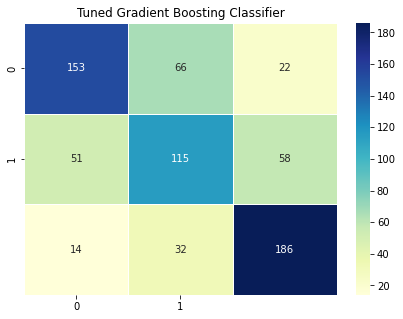

In [162]:
c_matrix(clf_gbc,'Tuned Gradient Boosting Classifier','cm_gbc.png')

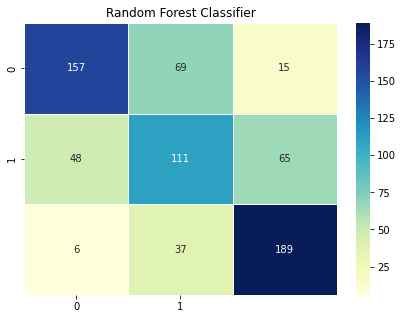

In [163]:
c_matrix(rf,'Random Forest Classifier','cm_rf.png')

In [177]:
#merge feature importances
fis = pd.merge(fi_dt,fi_rf,on='variables',how='inner')
fis.rename({'importance_x':'decision_tree','importance_y':'random_forest'},axis=1,inplace=True)
fis = pd.merge(fis,fi_abc,on='variables',how='inner')
fis = pd.merge(fis,fi_gbc,on='variables',how='inner')
fis.rename({'importance_x':'adaboost','importance_y':'gradient_boost'},axis=1,inplace=True)
fis.sort_values('random_forest',ascending=False,inplace=True)
fis = fis.fillna(0)
fis.head(10)

variables  decision_tree  random_forest  adaboost  \
25  REFUSETONSCOLLECTED_pp       0.155688       0.129119  0.000000   
38           business_sqmi       0.111264       0.118684  0.000000   
27     MGPTONSCOLLECTED_pp       0.162145       0.106998  0.000000   
26   PAPERTONSCOLLECTED_pp       0.059568       0.097692  0.000000   
17                numbldgs       0.057846       0.073748  0.038626   
19             asland_sqft       0.083835       0.073399  0.050567   
18              unitstotal       0.043642       0.063836  0.066288   
28      RESORGANICSTONS_pp       0.025325       0.041801  0.000000   
16             pop_density       0.131163       0.036089  0.000000   
36            fs_open_sqmi       0.035033       0.018093  0.026213   

    gradient_boost  
25        0.164901  
38        0.116176  
27        0.091068  
26        0.060397  
17        0.046704  
19        0.077037  
18        0.041812  
28        0.037939  
16        0.095549  
36        0.020767

<AxesSubplot:title={'center':'Feature Importance by Model'}, xlabel='variables'>

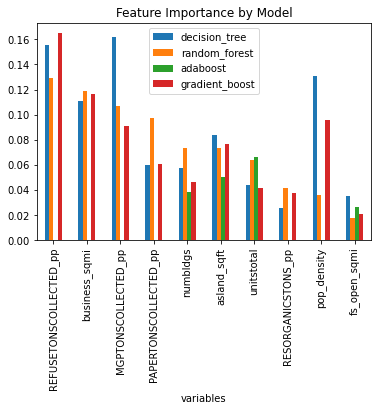

In [179]:
fis.head(10).plot(x='variables',
        kind='bar',
        stacked=False,
        title='Feature Importance by Model')